<a href="https://colab.research.google.com/github/LThomp101/NiyPy2018/blob/main/EJScreen_ExploratoryCIAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of EJScreen Indicators and Cumulative Impacts Score



#**Introduction**:
EJScreen uses a combination of pollution and demographic data to estimate block groups with potential environmental justice considerations. The EPA is considering removing race/percent minority as an indicator because of litigation concerns and potential backlash in reference to the Equal Protection Clause.

Our data compiles each indicator into respective compotenets and impact factors. Together, the data is matched with census block groups to create percentile cumulative impact scores. The analysis seeks to investiagte the relationship between indicators, components, and the EJScreen ranking methodology. Specifically, how removing the percent minority indicator (in the socioeconomic factors category) could potentially change the CI score's ability to estimate vulerability.

Data was pulled from the EPA's website: https://gaftp.epa.gov/EJSCREEN/2021/


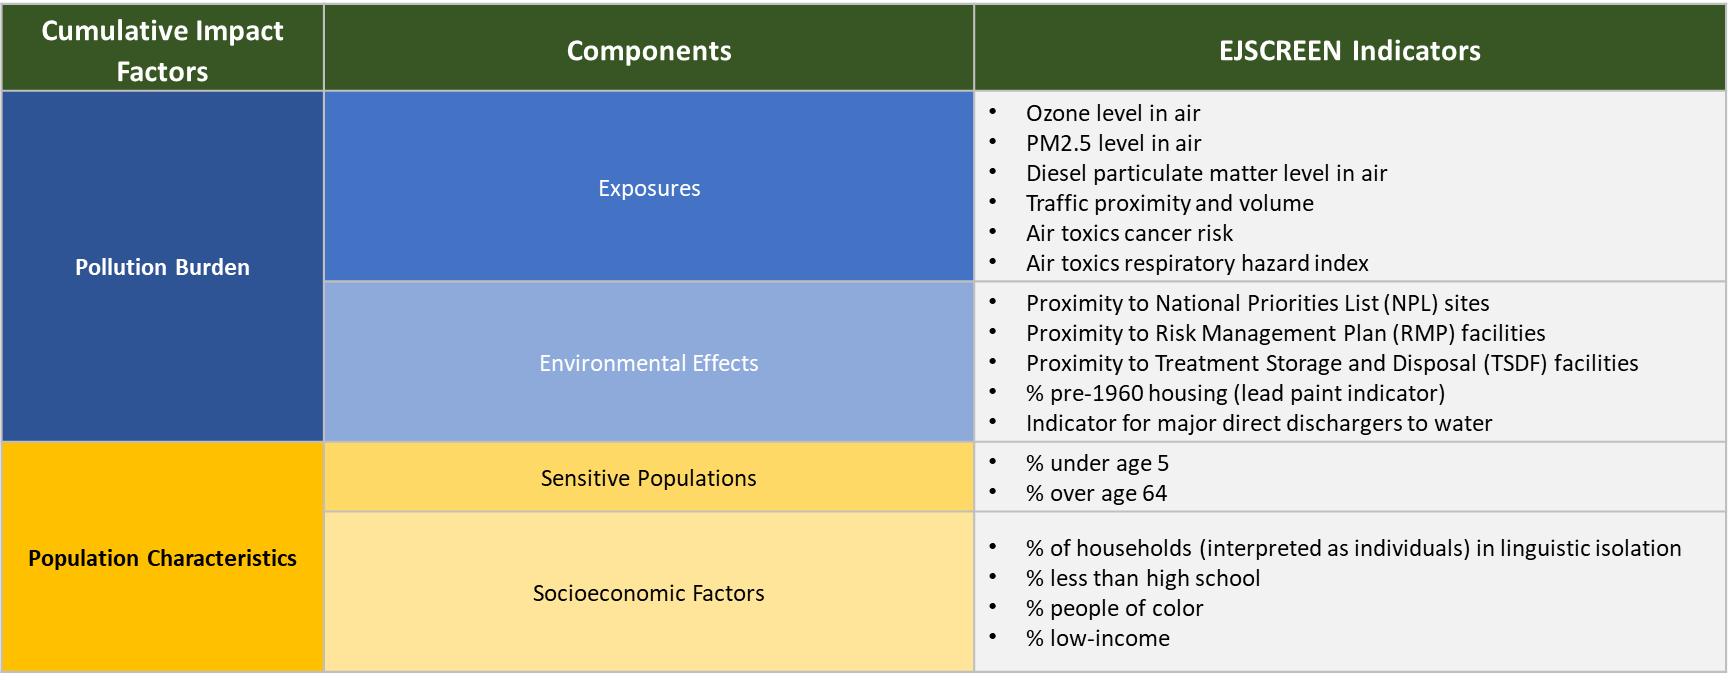

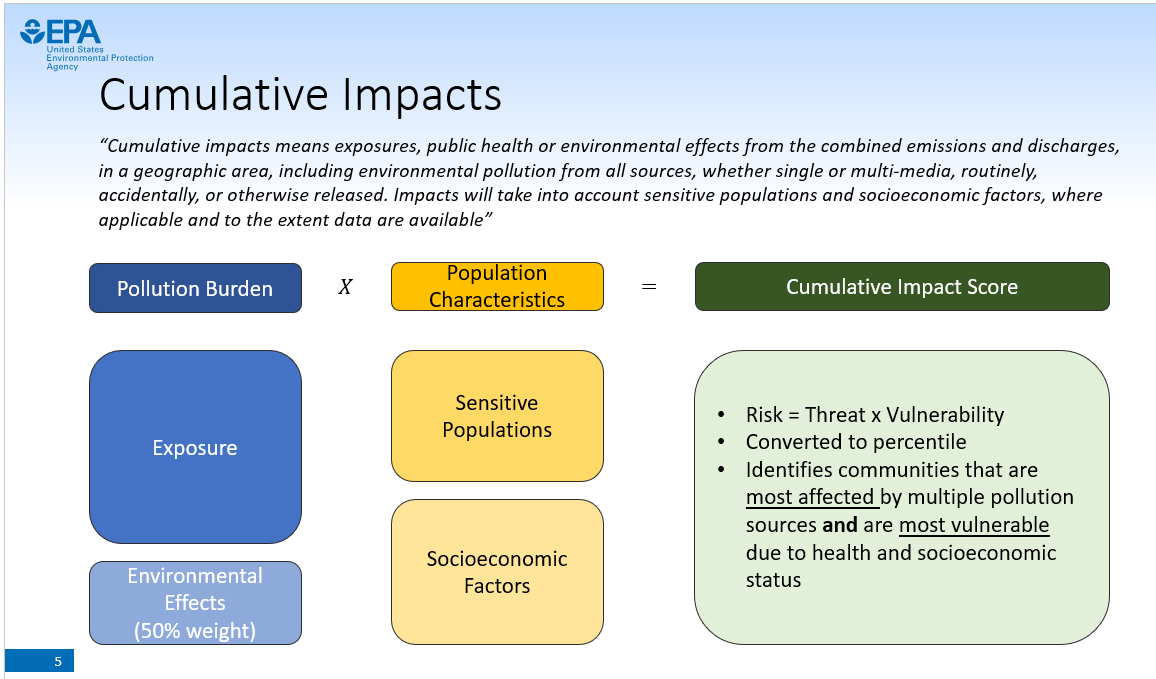

# Data Overview
Each ranking relates to a United States block group and translates to a percentile (e.g, A block group is in the 59th percentile for sensitive populations as compared to the rest of the country's block groups)

In [ ]:
Scores_Original

,P_CI_SCORE,P_EXPOSURE,P_ENV_EFFECTS,P_SENS_POP,P_SOC_FACTORS,P_MINORPCT
0,0,0,0,0,0,2
1,0,0,0,0,0,2
2,0,0,0,0,0,2
3,0,0,0,0,0,2
4,0,0,0,0,0,2
...,...,...,...,...,...,...
217734,100,100,90,70,92,76
217735,98,100,93,24,95,92
217736,97,100,97,12,94,89
217737,100,100,96,83,95,94


In [ ]:
Scores_Original.describe()

,P_CI_SCORE,P_EXPOSURE,P_ENV_EFFECTS,P_SENS_POP,P_SOC_FACTORS,P_MINORPCT
count,217739.0000,217739.000000,217739.0000,217739.000000,217739.000000,217739.000000
mean,50.0000,49.999982,50.0000,49.996666,49.998328,47.176119
std,28.8706,28.870630,28.8706,28.876316,28.873466,29.602487
min,0.0000,0.000000,0.0000,0.000000,0.000000,2.000000
25%,25.0000,25.000000,25.0000,25.000000,25.000000,21.000000
50%,50.0000,50.000000,50.0000,50.000000,50.000000,46.000000
75%,75.0000,75.000000,75.0000,75.000000,75.000000,73.000000
max,100.0000,100.000000,100.0000,100.000000,100.000000,100.000000


# Data Compression
To run the dataset with 217k rows, perform singular value decompositon (SVD) to reduce the original matrix into a product of three simpler matrices. Rejoined the best approximations into a new matrix that we could then run.

<Figure size 432x432 with 0 Axes>

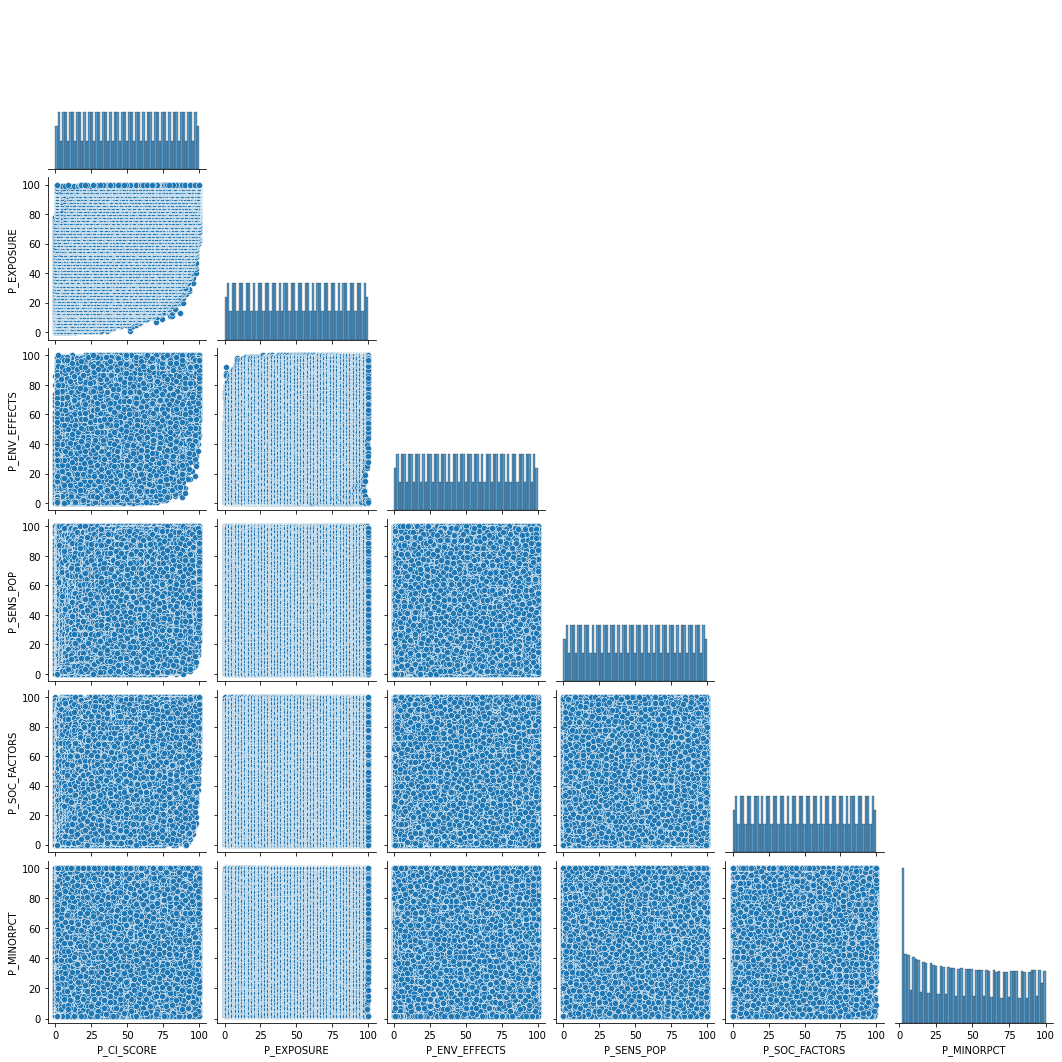

<Figure size 432x432 with 0 Axes>

In [ ]:
sns.pairplot(Scores_Original, corner=True);
plt.figure(figsize=(6,6))

# Linear Regression Model for Predicting CI:

4 Elements and without Percent Minority:



['P_EXPOSURE', 'P_ENV_EFFECTS', 'P_SENS_POP', 'P_SOC_FACTORS']

Model R^2 = 0.9353


- Difference between measured and true  
mean absolute error = 5.3486

root mean squared error = 7.3449


**Error Graph:**

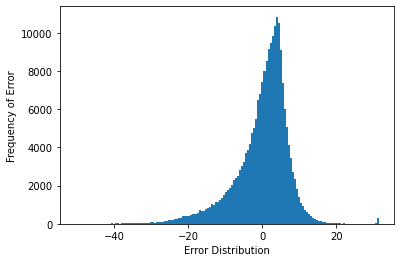!

#Model CI Prediction Without Socioeconomic Factors or Percent Minority:
['P_EXPOSURE', 'P_ENV_EFFECTS', 'P_SENS_POP']

Model R^2 = 0.7748

-Avg difference between predicted and true value

mean absolute error = 10.9555

root mean squared error = 13.7011

NOTE: Larger spread of error in predicting CI and reduced R2 compared to all 4 elements


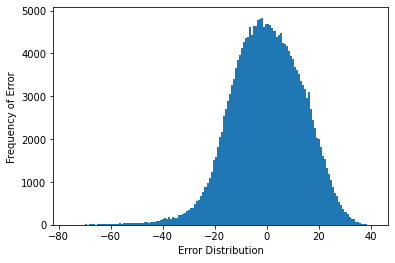

# Evaluating the model's ability to predict CI without socioeconomic factors but with percent minority:

Model R^2 = 0.8211

mean absolute error = 9.6944

root mean squared error = 12.2100

R2 improved but is still not as predictive as with all 4 elements

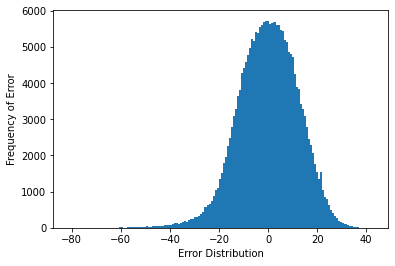

## **Double Checking Our Work**

Using OLS Coefficients

# 4 Main Elements:
P_EXPOSURE        0.568702

P_ENV_EFFECTS     0.284582

P_SENS_POP        0.367320

P_SOC_FACTORS     0.411724

R2:  0.9352758410394596

# 3 Elements ( - Socioeconomic Factors)
P_EXPOSURE        0.595279

P_ENV_EFFECTS     0.361810

P_SENS_POP        0.368508

R2:  0.7747844492452108

# 3 Elements (+ Percent Minority)
P_EXPOSURE        0.500213

P_ENV_EFFECTS     0.318017

P_SENS_POP        0.391456

P_MINORPCT        0.246069

R2:  0.8211358602841405

# Therefore,  

(4 Elements) 0.935 - (3 Elements) 0.774 = 0.161 R2 difference


(0.935-0.774)/0.935 = 17.2% decrease when socioeconomic factors are removed

(4 Elements) 0.935 - (3 Elements + % Minority) 0.821 = 0.114 R2 difference

(0.935-0.821)/0.935 = 12.2% decrease when socioeconomic factors are removed, but % minority are included

The percentage of power percent minority has on the socioeconomic indicator's impact on the CI Score: 0.161/0.047*100% = 0.292 = 29.2%


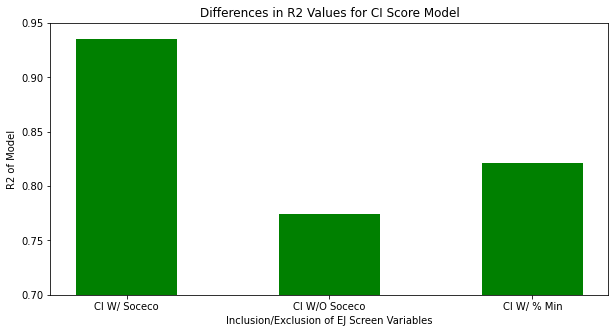

**Using an Artificial Neural Net tool**


Split data  training 80/ testing 20

Scaled the data

Evaluated the scaled training set for stdv of 1 and mean of 0

Fit the scaled model with an MLP Regressor with 16 layers and 1000 iterations

Training and Testing: 0.9969081413265622 and 0.9969737386242843

Training and testing R2 values are almost indentical. This suggests the model is predicting the training data almost as well as the testing. Thus, the model must have learned the pattern to accurately predict CI scores using the 4 elements. The model is performing well.

**Removing socioeconomic factors to see how much it contributes to the CI score with the ANN**

With the removal of this component, the model preformance drops from 0.9968135/0.9968089 to 0.8147890/0.8149206.

This is a 0.1820245 drop.

**Adding % minority to see how much it contributes to the CI score with the ANN**

With the addition of this component, the model preformance increases from
0.8147890/0.8149206 to 0.8704548/0.8692494

This is a 0.0556658 increase.  

Doing the same comparison as above in the linear regression, we get a contribution of 0.0556658/0.1820245*100% = 0.3058148 = 30.58% relative contribution of % minority to socioeconomic factors and a roughly
0.0556658/0.9968135*100 = 5.58% contribution to the actual CI score.

Would need to review the data/information for all the other EJScreen Indicators to fully verify this, but with the data at hand, the rationale seems plausible.



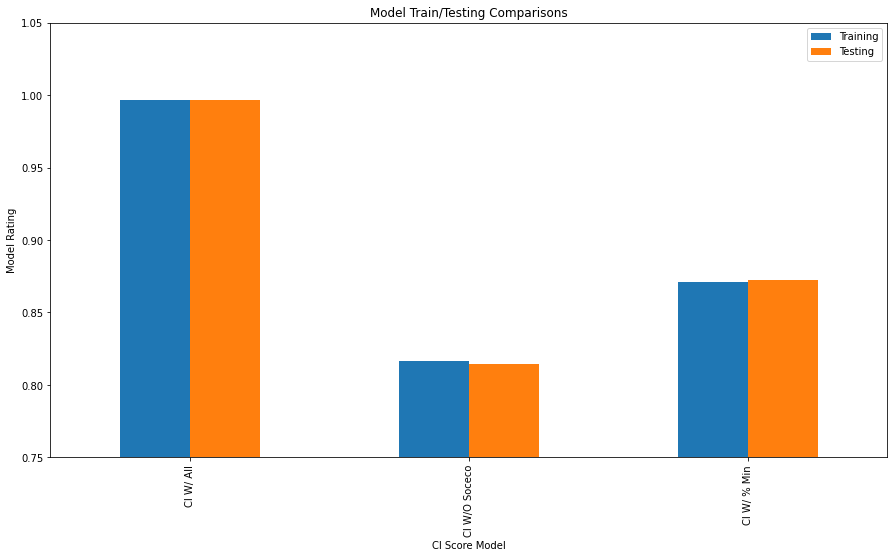








**Model Optimization**


Score_model = MLPRegressor(hidden_layer_sizes=(30), solver='adam', alpha=0.1, momentum=0.2,  max_iter=1000)


**0.9987286781547914 & 0.9987726501254698**

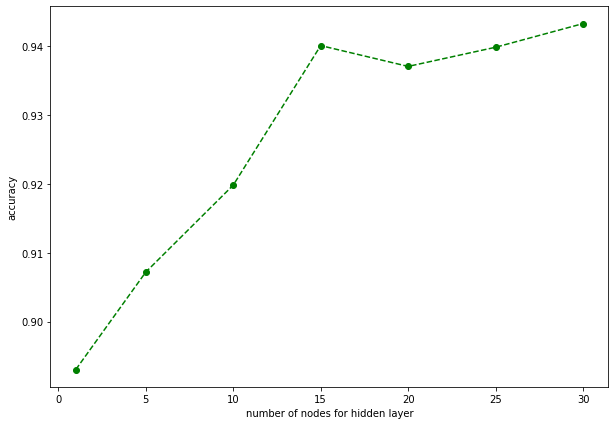

# Cross Validation:

Did a 10-fold cross validation with training and testing sets.

Average score for each fold was = 0.9644 +/- 0.0008


 ** Did not perfom a LOOCV because of the processing time

## Conclusion
There is some evidence to suggest removing percent minority as an indicator can affect the cumulative impact score. And if left out, the score may not fully capture communities of color and their vulnerability. However, the decision should be analyzed further with additional data on the other socioeconomic indicators.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
from scipy import linalg



Scores_Original = pd.read_csv('/content/2021 draft scores_v2.csv', thousands = ',')
Scores_Original = Scores_Original.replace(',','', regex=True)
Scores_Original = Scores_Original.drop(["ID","GEOID", "P_CI_SCORE_WO_SENSPOP", "P_CI_SCORE_WO_SENSPOP_W_LIFEEXP","P_ALT_DEMO_INDEX_WLIFEEXP_P_BASED", "P_ALT_DEMO_INDEX_WLIFEEXP", "P_ALT_DEMO_INDEX_P_BASED", "P_ALT_DEMO_INDEX", "P_POP_DENS", "P_POP_CHAR", "ACSTOTPOP", "P_VULEOPCT", "P_POL_BURDEN"],axis=1)
Scores_Original_ColNames = Scores_Original

type(Scores_Original)

pandas.core.frame.DataFrame

In [ ]:
Scores_Original

,P_CI_SCORE,P_EXPOSURE,P_ENV_EFFECTS,P_SENS_POP,P_SOC_FACTORS,P_MINORPCT
0,0,0,0,0,0,2
1,0,0,0,0,0,2
2,0,0,0,0,0,2
3,0,0,0,0,0,2
4,0,0,0,0,0,2
...,...,...,...,...,...,...
217734,100,100,90,70,92,76
217735,98,100,93,24,95,92
217736,97,100,97,12,94,89
217737,100,100,96,83,95,94


In [ ]:
Scores_Original.describe()

,P_CI_SCORE,P_EXPOSURE,P_ENV_EFFECTS,P_SENS_POP,P_SOC_FACTORS,P_MINORPCT
count,217739.0000,217739.000000,217739.0000,217739.000000,217739.000000,217739.000000
mean,50.0000,49.999982,50.0000,49.996666,49.998328,47.176119
std,28.8706,28.870630,28.8706,28.876316,28.873466,29.602487
min,0.0000,0.000000,0.0000,0.000000,0.000000,2.000000
25%,25.0000,25.000000,25.0000,25.000000,25.000000,21.000000
50%,50.0000,50.000000,50.0000,50.000000,50.000000,46.000000
75%,75.0000,75.000000,75.0000,75.000000,75.000000,73.000000
max,100.0000,100.000000,100.0000,100.000000,100.000000,100.000000


In [ ]:
#Singular Value Decomposition
u,s,vh = np.linalg.svd(Scores_Original, full_matrices=False, compute_uv=True, hermitian=False)

u.shape, s.shape, vh.shape
np.allclose(Scores_Original, np.dot(u * s, vh))

smat = np.diag(s)
np.allclose(Scores_Original, np.dot(u, np.dot(smat, vh)))
print

Scores_Originalsvd = u @ np.diag(s) @ vh
Scores_Original = pd.DataFrame(Scores_Originalsvd, columns= Scores_Original_ColNames.columns)
print(Scores_Original.head)

<bound method NDFrame.head of           P_CI_SCORE    P_EXPOSURE  P_ENV_EFFECTS    P_SENS_POP  \
0       3.697320e-16  1.098223e-11  -1.735539e-11 -1.401513e-11   
1       9.465469e-16  1.478266e-15   1.471490e-13  2.188840e-12   
2       1.086628e-15  1.249668e-15   1.778594e-15  2.417232e-13   
3       1.127766e-15  1.355146e-15   6.315499e-16  1.174736e-15   
4       9.479203e-16  1.261394e-15   7.409834e-16  4.291252e-16   
...              ...           ...            ...           ...   
217734  1.000000e+02  1.000000e+02   9.000000e+01  7.000000e+01   
217735  9.800000e+01  1.000000e+02   9.300000e+01  2.400000e+01   
217736  9.700000e+01  1.000000e+02   9.700000e+01  1.200000e+01   
217737  1.000000e+02  1.000000e+02   9.600000e+01  8.300000e+01   
217738  1.000000e+02  1.000000e+02   9.700000e+01  7.600000e+01   

        P_SOC_FACTORS  P_MINORPCT  
0        9.244886e-12         2.0  
1        1.415290e-12         2.0  
2        1.513632e-13         2.0  
3        2.704968e-13

In [ ]:
Scores_Original

,P_CI_SCORE,P_EXPOSURE,P_ENV_EFFECTS,P_SENS_POP,P_SOC_FACTORS,P_MINORPCT
0,5.730556e-16,6.451673e-13,-1.109880e-11,-8.806200e-12,1.679902e-12,2.0
1,5.650182e-16,3.933019e-16,5.256444e-13,2.939774e-12,1.372080e-12,2.0
2,6.601999e-16,4.957152e-16,-4.760554e-16,-1.527567e-12,5.131245e-13,2.0
3,6.218999e-16,4.378295e-16,-3.932472e-16,-3.050494e-16,-8.680753e-13,2.0
4,5.723502e-16,4.982559e-16,-3.572708e-16,-1.139410e-16,4.853557e-16,2.0
...,...,...,...,...,...,...
217734,1.000000e+02,1.000000e+02,9.000000e+01,7.000000e+01,9.200000e+01,76.0
217735,9.800000e+01,1.000000e+02,9.300000e+01,2.400000e+01,9.500000e+01,92.0
217736,9.700000e+01,1.000000e+02,9.700000e+01,1.200000e+01,9.400000e+01,89.0
217737,1.000000e+02,1.000000e+02,9.600000e+01,8.300000e+01,9.500000e+01,94.0


In [ ]:
# Reading in the variables as x and y
#Scores_Original = Scores_Original.sample(n = 5000)
Scores_Original_0 = Scores_Original.drop(["P_MINORPCT"],axis=1)
xlist0 = Scores_Original_0.columns.values.tolist()
xlist_0 = list(xlist0)

yvar = 'P_CI_SCORE'
#yvar_alt_list = ('P_CI_SCORE_WO_SENSPOP_W_LIFEEXP','P_CI_SCORE_WO_SENSPOP','P_MINORPCT')

for element in xlist_0:
    if element in yvar:
      xlist_0.remove(element)

xvars0 = xlist_0
print(xvars0)
print(yvar)

# Create and fit the model
model = LinearRegression()
Fitted = model.fit(Scores_Original_0[xvars0], Scores_Original_0[yvar])
Yvar_predicted_0 = model.predict(Scores_Original_0[xvars0])

# Model Result
Yvar_actual_0 = Scores_Original_0[yvar].to_numpy()
error_0 = Yvar_actual_0 - Yvar_predicted_0
absolute_e = abs(error_0)

# Need some value to get non 0 actual CI scores
print('P_CI  predict  error')
print('======  =======  =======')
for i in range(5):
    print(f'{Yvar_actual_0[i]:6.2f}  {Yvar_predicted_0[i]:7.2f}  {error_0[i]:7.2f}')

# R2 of Model Results with all y values
print('Model R^2 = {:.4f}'.format(model.score(Scores_Original_0[xvars0], Scores_Original_0[yvar])))

# Assess the Quality of Multilinear Model
print('mean absolute error = {:.4f}'.format(np.mean(np.abs(error_0))))
print('root mean squared error = {:.4f}'.format(np.sqrt(np.mean(error_0**2))))



['P_EXPOSURE', 'P_ENV_EFFECTS', 'P_SENS_POP', 'P_SOC_FACTORS']
P_CI_SCORE
P_CI  predict  error
======  =======  =======
  0.00   -31.61    31.61
  0.00   -31.61    31.61
  0.00   -31.61    31.61
  0.00   -31.61    31.61
  0.00   -31.61    31.61
Model R^2 = 0.9353
mean absolute error = 5.3486
root mean squared error = 7.3449


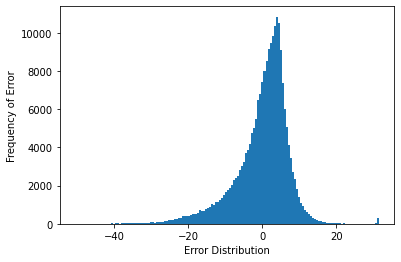

In [ ]:
plt.hist(error_0, bins = 150)
plt.xlabel('Error Distribution')
plt.ylabel('Frequency of Error');

In [ ]:
Scores_Original_1 = Scores_Original.drop(["P_SOC_FACTORS", "P_MINORPCT"],axis=1)
Scores_Original_1
# Reading in the variables as x and y
#Scores_Original = Scores_Original.sample(n = 5000)


xlist1 = Scores_Original_1.columns.values.tolist()
xlist_1 = list(xlist1)

yvar = 'P_CI_SCORE'
#yvar_alt_list = ('P_CI_SCORE_WO_SENSPOP_W_LIFEEXP','P_CI_SCORE_WO_SENSPOP','P_MINORPCT')

for element in xlist_1:
    if element in yvar:
      xlist_1.remove(element)

xvars_1 = xlist_1
print(xvars_1)
print(yvar)

# Create and fit the model
model_1 = LinearRegression()
Fitted1 = model_1.fit(Scores_Original[xvars_1], Scores_Original[yvar])
Yvar_predicted_1 = model_1.predict(Scores_Original_1[xvars_1])

# Model Result
Yvar_actual_1 = Scores_Original[yvar].to_numpy()
error_1 = Yvar_actual_1 - Yvar_predicted_1
absolute_e_1 = abs(error_1)

print('Actual CI  predict  error')
print('======  =======  =======')
for i in range(1):
    print(f'{Yvar_actual_1[i]:6.2f}  {Yvar_predicted_1[i]:7.2f}  {error_1[i]:7.2f}')

# R2 of Model Results with all y values
print('Model R^2 = {:.4f}'.format(model_1.score(Scores_Original_1[xvars_1], Scores_Original_1[yvar])))

# Assess the Quality of Multilinear Model
print('mean absolute error = {:.4f}'.format(np.mean(np.abs(error_1))))
print('root mean squared error = {:.4f}'.format(np.sqrt(np.mean(error_1**2))))

['P_EXPOSURE', 'P_ENV_EFFECTS', 'P_SENS_POP']
P_CI_SCORE
Actual CI  predict  error
======  =======  =======
  0.00   -16.28    16.28
Model R^2 = 0.7748
mean absolute error = 10.9555
root mean squared error = 13.7011


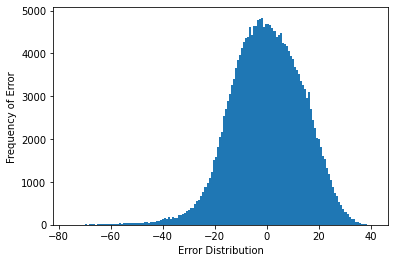

In [ ]:
plt.hist(error_1, bins = 150)
plt.xlabel('Error Distribution')
plt.ylabel('Frequency of Error');

In [ ]:
Scores_Original_2 = Scores_Original.drop(["P_SOC_FACTORS"],axis=1)
Scores_Original_2
# Reading in the variables as x and y
#Scores_Original = Scores_Original.sample(n = 5000)
xlist2 = Scores_Original_2.columns.values.tolist()
xlist_2 = list(xlist2)

yvar = 'P_CI_SCORE'
#yvar_alt_list = ('P_CI_SCORE_WO_SENSPOP_W_LIFEEXP','P_CI_SCORE_WO_SENSPOP','P_MINORPCT')

for element in xlist_2:
    if element in yvar:
      xlist_2.remove(element)

xvars_2 = xlist_2
print(xvars_2)
print(yvar)

# Create and fit the model
model2 = LinearRegression()
Fitted2 = model2.fit(Scores_Original[xvars_2], Scores_Original[yvar])
Yvar_predicted_2 = model2.predict(Scores_Original_2[xvars_2])

# Model Result
Yvar_actual_2 = Scores_Original[yvar].to_numpy()
error_2 = Yvar_actual_2 - Yvar_predicted_2
absolute_e_2 = abs(error_2)


###### Actual percent Minority but just changed it to CI SCores
print('Actual CI  predict  error')
print('======     =======  =======')
for i in range(1):
    print(f'{Yvar_actual_2[i]:6.2f}  {Yvar_predicted_2[i]:7.2f}  {error_2[i]:7.2f}')

# R2 of Model Results with all y values
print('Model R^2 = {:.4f}'.format(model2.score(Scores_Original_2[xvars_2], Scores_Original_2[yvar])))

# Assess the Quality of Multilinear Model
print('mean absolute error = {:.4f}'.format(np.mean(np.abs(error_2))))
print('root mean squared error = {:.4f}'.format(np.sqrt(np.mean(error_2**2))))

['P_EXPOSURE', 'P_ENV_EFFECTS', 'P_SENS_POP', 'P_MINORPCT']
P_CI_SCORE
Actual CI  predict  error
======     =======  =======
  0.00   -21.60    21.60
Model R^2 = 0.8211
mean absolute error = 9.6944
root mean squared error = 12.2100


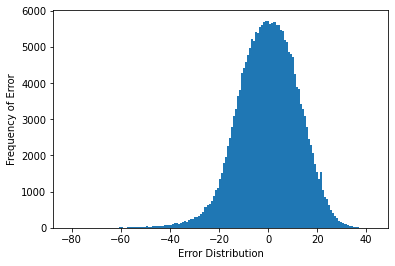

In [ ]:
plt.hist(error_2, bins = 150)
plt.xlabel('Error Distribution')
plt.ylabel('Frequency of Error');

In [ ]:
# Assessing Quality: Ordinary Least Squares
# Positive or Negative relationship with the dependent variable?



#Scores_Original_ols = pd.DataFrame({'x':xvars, 'y':yvar})
results_0 = sm.ols('P_CI_SCORE ~  P_EXPOSURE + P_ENV_EFFECTS + P_SENS_POP + P_SOC_FACTORS', data=Scores_Original).fit()
 #  + P_POP_CHAR + P_MINORPCT + P_VULEOPCT + ACSTOTPOP + P_ALT_DEMO_INDEX +  + P_MINORPCT

print('Parameters:', results_0.params)
print('R2: ', results_0.rsquared)
print()

Parameters: Intercept       -31.614465
P_EXPOSURE        0.568702
P_ENV_EFFECTS     0.284582
P_SENS_POP        0.367320
P_SOC_FACTORS     0.411724
dtype: float64
R2:  0.9352758410394596



In [ ]:
results_1 = sm.ols('P_CI_SCORE ~  P_EXPOSURE + P_ENV_EFFECTS + P_SENS_POP', data=Scores_Original).fit()
 #  + P_POP_CHAR + P_MINORPCT + P_VULEOPCT + ACSTOTPOP + P_ALT_DEMO_INDEX +  + P_MINORPCT

print('Parameters:', results_1.params)
print('R2: ', results_1.rsquared)
print()

Parameters: Intercept       -16.278611
P_EXPOSURE        0.595279
P_ENV_EFFECTS     0.361810
P_SENS_POP        0.368508
dtype: float64
R2:  0.7747844492452108



In [ ]:
results_2 = sm.ols('P_CI_SCORE ~  P_EXPOSURE + P_ENV_EFFECTS + P_SENS_POP + P_MINORPCT', data=Scores_Original).fit()
 #  + P_POP_CHAR + P_MINORPCT + P_VULEOPCT + ACSTOTPOP + P_ALT_DEMO_INDEX +  +

print('Parameters:', results_2.params)
print('R2: ', results_2.rsquared)
print()

Parameters: Intercept       -22.091571
P_EXPOSURE        0.500213
P_ENV_EFFECTS     0.318017
P_SENS_POP        0.391456
P_MINORPCT        0.246069
dtype: float64
R2:  0.8211358602841405



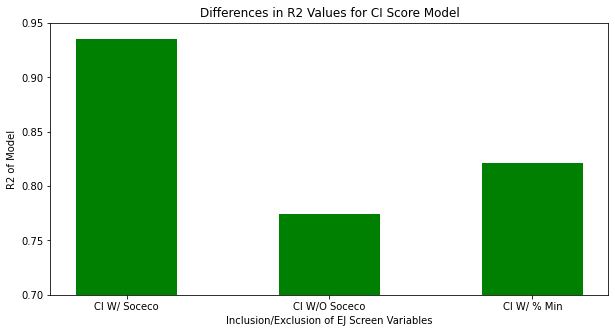

In [ ]:

# Dataset generation
data_dict = {'CI W/ Soceco':0.935, 'CI W/O Soceco':0.774, 'CI W/ % Min':0.821}
CI = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(CI, values, color ='green',
        width = 0.5)
plt.xlabel("Inclusion/Exclusion of EJ Screen Variables")
plt.ylabel("R2 of Model")
plt.ylim(0.7, 0.95)
plt.title("Differences in R2 Values for CI Score Model")
plt.show()

In [ ]:
#Neuro Work

#Training & Testing Split

x0, y0 = Scores_Original_0[xvars0], Scores_Original_0[yvar]

x0_train, x0_test, y0_train, y0_test = train_test_split(x0, y0, train_size=0.8, shuffle=True)

x0_train, y0_train = x0_train.to_numpy(), y0_train.to_numpy().reshape(-1,1)
x0_test, y0_test = x0_test.to_numpy(), y0_test.to_numpy()


In [ ]:
#Scaling

x0_scaler = StandardScaler().fit(x0_train)
y0_scaler = StandardScaler().fit(y0_train)

print(' n      mean        stdev')
print('==   ==========   ==========')
for i in range(4):
    print('{0:2d}   {1:10.4f}   {2:10.4f}'.format(i, x0_scaler.mean_[i], x0_scaler.scale_[i]))
print('{0:2d}   {1:10.4f}   {2:10.4f}'.format(5, y0_scaler.mean_[0], y0_scaler.scale_[0]))

#Reshape
x0_train_scaled = x0_scaler.transform(x0_train)
y0_train_scaled = y0_scaler.transform(y0_train)

x0_test_scaled = x0_scaler.transform(x0_test)
y0_test_scaled = y0_scaler.transform(y0_test.reshape(-1,1))


 n      mean        stdev
==   ==========   ==========
 0      50.0080      28.8695
 1      50.0186      28.8691
 2      49.9353      28.8614
 3      50.0069      28.8802
 5      49.9970      28.8693


In [ ]:
#Evaluated scaled training set and should get mean of 0 and stdv of 1
print(' n     u/mean      s')
print('==   =====  =====')
for i in range(4):
    print('{0:2d}   {1:5.2f}  {2:5.2f}'.format(i, np.mean(x0_train_scaled[:,i]), np.std(x0_train_scaled[:,i])))
print('{0:2d}   {1:5.2f}  {2:5.2f}'.format(5, np.mean(y0_train_scaled), np.std(y0_train_scaled)))


 n     u/mean      s
==   =====  =====
 0    0.00   1.00
 1   -0.00   1.00
 2   -0.00   1.00
 3    0.00   1.00
 5    0.00   1.00


In [ ]:
#Model Fitting

Score_model_0 = MLPRegressor(hidden_layer_sizes=(16), solver='adam', max_iter=1000)
Score_model_0.fit(x0_train_scaled, y0_train_scaled.flatten())

#Model Testing
TrainModel_0 = Score_model_0.score(x0_train_scaled, y0_train_scaled)
TestModel_0 = Score_model_0.score(x0_test_scaled, y0_test_scaled)

print(TrainModel_0,TestModel_0)



0.9963113484556114 0.9963190525156959


In [ ]:
#Training & Testing Split
x1, y1 = Scores_Original[xvars_1], Scores_Original[yvar]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.8, shuffle=True)

x1_train, y1_train = x1_train.to_numpy(), y1_train.to_numpy().reshape(-1,1)
x1_test, y1_test = x1_test.to_numpy(), y1_test.to_numpy()

#Scaling
x1_scaler = StandardScaler().fit(x1_train)
y1_scaler = StandardScaler().fit(y1_train)

print(' n      mean        stdev')
print('==   ==========   ==========')
for i in range(3):
    print('{0:2d}   {1:10.4f}   {2:10.4f}'.format(i, x1_scaler.mean_[i], x1_scaler.scale_[i]))
print('{0:2d}   {1:10.4f}   {2:10.4f}'.format(3, y1_scaler.mean_[0], y1_scaler.scale_[0]))

#Reshape
x1_train_scaled = x1_scaler.transform(x1_train)
y1_train_scaled = y1_scaler.transform(y1_train)

x1_test_scaled = x1_scaler.transform(x1_test)
y1_test_scaled = y1_scaler.transform(y1_test.reshape(-1,1))

#Evaluated scaled training set and should get mean of 0 and stdv of 1
print(' n     u      s')
print('==   =====  =====')
for i in range(3):
    print('{0:2d}   {1:5.2f}  {2:5.2f}'.format(i, np.mean(x1_train_scaled[:,i]), np.std(x1_train_scaled[:,i])))
print('{0:2d}   {1:5.2f}  {2:5.2f}'.format(3, np.mean(y1_train_scaled), np.std(y1_train_scaled)))


#Model Fitting
Score_model1 = MLPRegressor(hidden_layer_sizes=(16), solver='adam', max_iter=1000)

Score_model1.fit(x1_train_scaled, y1_train_scaled.flatten())

#Model Testing
TrainModel1 = Score_model1.score(x1_train_scaled, y1_train_scaled)
TestModel1 = Score_model1.score(x1_test_scaled, y1_test_scaled)

print(TrainModel1,TestModel1)

 n      mean        stdev
==   ==========   ==========
 0      50.0362      28.8855
 1      50.0095      28.8598
 2      49.9906      28.8648
 3      50.0163      28.8755
 n     u      s
==   =====  =====
 0    0.00   1.00
 1   -0.00   1.00
 2   -0.00   1.00
 3    0.00   1.00
0.8150131196112353 0.8159578334745097


In [ ]:
#Training & Testing Split using
x2, y2 = Scores_Original[xvars_2], Scores_Original[yvar]

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.8, shuffle=True)

x2_train, y2_train = x2_train.to_numpy(), y2_train.to_numpy().reshape(-1,1)
x2_test, y2_test = x2_test.to_numpy(), y2_test.to_numpy()

#Scaling
x2_scaler = StandardScaler().fit(x2_train)
y2_scaler = StandardScaler().fit(y2_train)

print(' n      mean        stdev')
print('==   ==========   ==========')
for i in range(4):
    print('{0:2d}   {1:10.4f}   {2:10.4f}'.format(i, x2_scaler.mean_[i], x2_scaler.scale_[i]))
print('{0:2d}   {1:10.4f}   {2:10.4f}'.format(4, y2_scaler.mean_[0], y2_scaler.scale_[0]))

#Reshape
x2_train_scaled = x2_scaler.transform(x2_train)
y2_train_scaled = y2_scaler.transform(y2_train)

x2_test_scaled = x2_scaler.transform(x2_test)
y2_test_scaled = y2_scaler.transform(y2_test.reshape(-1,1))

#Evaluated scaled training set and should get mean of 0 and stdv of 1
print(' n     u      s')
print('==   =====  =====')
for i in range(3):
    print('{0:2d}   {1:5.2f}  {2:5.2f}'.format(i, np.mean(x2_train_scaled[:,i]), np.std(x2_train_scaled[:,i])))
print('{0:2d}   {1:5.2f}  {2:5.2f}'.format(3, np.mean(y2_train_scaled), np.std(y2_train_scaled)))


#Model Fitting
Score_model2 = MLPRegressor(hidden_layer_sizes=(16), solver='adam', max_iter=1000)
Score_model2.fit(x2_train_scaled, y2_train_scaled.flatten())

#Model Testing
TrainModel2 = Score_model2.score(x2_train_scaled, y2_train_scaled)
TestModel2 = Score_model2.score(x2_test_scaled, y2_test_scaled)

print(TrainModel2,TestModel2)

 n      mean        stdev
==   ==========   ==========
 0      50.0218      28.8885
 1      50.0000      28.8675
 2      50.0145      28.8771
 3      47.1780      29.6180
 4      50.0220      28.8936
 n     u      s
==   =====  =====
 0    0.00   1.00
 1   -0.00   1.00
 2   -0.00   1.00
 3    0.00   1.00
0.8718403599123488 0.8708821965265232


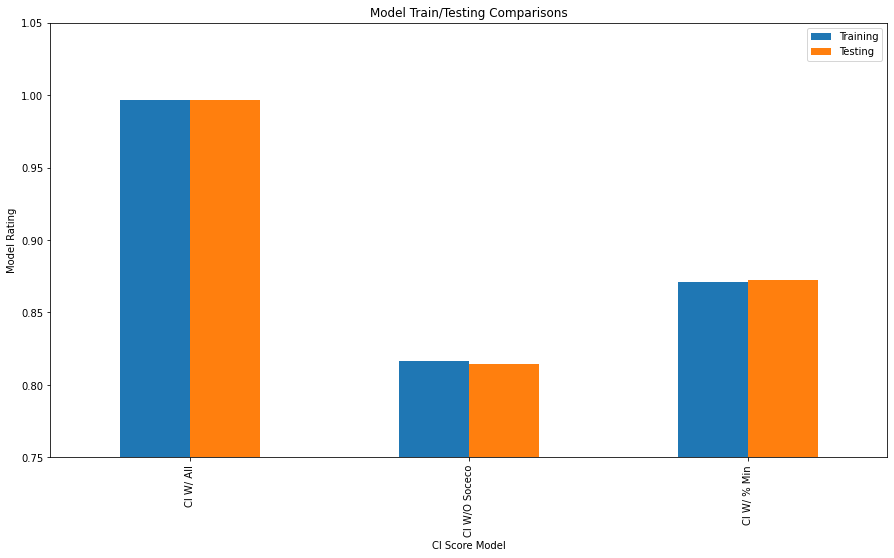

In [ ]:
plotdata = pd.DataFrame({
    "Training":[0.9965785591372137,0.8161975597802488,0.870746948736331],
    "Testing":[0.9966139871174161,0.8141250483522706,0.8724254519637736]    },
    index=["CI W/ All", "CI W/O Soceco", "CI W/ % Min"] )
plotdata.plot(kind="bar",figsize=(15, 8))
plt.title("Model Train/Testing Comparisons")
plt.xlabel("CI Score Model")
plt.ylabel("Model Rating")
plt.ylim(0.75, 1.05);

**Optimization of ANN parameters**

In [ ]:
Scores_Original = pd.read_csv('/content/2021 draft scores_v2 (1).csv', thousands = ',')
Scores_Original = Scores_Original.replace(',','', regex=True)
Scores_Original = Scores_Original.drop([ "Unnamed: 0",	"Unnamed: 1", "P_CI_SCORE_WO_SENSPOP", "P_CI_SCORE_WO_SENSPOP_W_LIFEEXP","P_ALT_DEMO_INDEX_WLIFEEXP_P_BASED", "P_ALT_DEMO_INDEX_WLIFEEXP", "P_ALT_DEMO_INDEX_P_BASED", "P_ALT_DEMO_INDEX", "P_POP_DENS", "P_POP_CHAR", "ACSTOTPOP", "P_VULEOPCT", "P_POL_BURDEN"],axis=1)
Scores_Original_ColNames = Scores_Original

type(Scores_Original)

pandas.core.frame.DataFrame

In [ ]:
#Singular Value Decomposition
u,s,vh = np.linalg.svd(Scores_Original, full_matrices=False, compute_uv=True, hermitian=False)

u.shape, s.shape, vh.shape
np.allclose(Scores_Original, np.dot(u * s, vh))

smat = np.diag(s)
np.allclose(Scores_Original, np.dot(u, np.dot(smat, vh)))
print

Scores_Originalsvd = u @ np.diag(s) @ vh
Scores_Original = pd.DataFrame(Scores_Originalsvd, columns= Scores_Original_ColNames.columns)
print(Scores_Original.head)

<bound method NDFrame.head of           P_CI_SCORE    P_EXPOSURE  P_ENV_EFFECTS    P_SENS_POP  \
0       5.730556e-16  6.451673e-13  -1.109880e-11 -8.806200e-12   
1       5.650182e-16  3.933019e-16   5.256444e-13  2.939774e-12   
2       6.601999e-16  4.957152e-16  -4.760554e-16 -1.527567e-12   
3       6.218999e-16  4.378295e-16  -3.932472e-16 -3.050494e-16   
4       5.723502e-16  4.982559e-16  -3.572708e-16 -1.139410e-16   
...              ...           ...            ...           ...   
217734  1.000000e+02  1.000000e+02   9.000000e+01  7.000000e+01   
217735  9.800000e+01  1.000000e+02   9.300000e+01  2.400000e+01   
217736  9.700000e+01  1.000000e+02   9.700000e+01  1.200000e+01   
217737  1.000000e+02  1.000000e+02   9.600000e+01  8.300000e+01   
217738  1.000000e+02  1.000000e+02   9.700000e+01  7.600000e+01   

        P_SOC_FACTORS  P_MINORPCT  
0        1.679902e-12         2.0  
1        1.372080e-12         2.0  
2        5.131245e-13         2.0  
3       -8.680753e-13

In [ ]:
# Reading in the variables as x and y
#Scores_Original = Scores_Original.sample(n = 5000)
Scores_Original_0 = Scores_Original.drop(["P_MINORPCT"],axis=1)
xlist0 = Scores_Original_0.columns.values.tolist()
xlist_0 = list(xlist0)

yvar = 'P_CI_SCORE'
#yvar_alt_list = ('P_CI_SCORE_WO_SENSPOP_W_LIFEEXP','P_CI_SCORE_WO_SENSPOP','P_MINORPCT')

for element in xlist_0:
    if element in yvar:
      xlist_0.remove(element)

xvars0 = xlist_0
print(xvars0)
print(yvar)
x, y = Scores_Original[xvars0], Scores_Original[yvar]

['P_EXPOSURE', 'P_ENV_EFFECTS', 'P_SENS_POP', 'P_SOC_FACTORS']
P_CI_SCORE


In [ ]:
x_scaled = StandardScaler().fit(x)

In [ ]:
Score_model = MLPRegressor(hidden_layer_sizes=(16), solver='adam', max_iter=1000)

In [ ]:
print('Grid search may be performed on any of the following parameters:')
for item in Score_model.get_params().keys():
    print('  ' + item)

Grid search may be performed on any of the following parameters:
  activation
  alpha
  batch_size
  beta_1
  beta_2
  early_stopping
  epsilon
  hidden_layer_sizes
  learning_rate
  learning_rate_init
  max_fun
  max_iter
  momentum
  n_iter_no_change
  nesterovs_momentum
  power_t
  random_state
  shuffle
  solver
  tol
  validation_fraction
  verbose
  warm_start


In [ ]:
def doGridSearch(Score_model, x_data, y_data, n_splits, params):
    gscv = GridSearchCV(Score_model, param_grid=params, n_jobs=-1, cv=n_splits)
    gscv.fit(x_data, y_data)
    return gscv

In [ ]:
params = { 'solver':[ 'sgd', 'adam', 'lbfgs' ] }
gsres = doGridSearch(Score_model, x, y, 3, params)

In [ ]:
mean, std = gsres.cv_results_['mean_test_score'], gsres.cv_results_['std_test_score']

print('         Mean     Std')
print('Solver   Score    Score')
print('======   ======   ======')
for idx in range(len(mean)):
    solver = params['solver'][idx]
    print(f'{solver:6s}   {mean[idx]:6.4f}   {std[idx]:6.4f}')

         Mean     Std
Solver   Score    Score
======   ======   ======
sgd      -2.7007   3.1728
adam     0.9364   0.0094
lbfgs    0.8978   0.0279


In [ ]:
params = { 'alpha':[0.001,0.01,0.1,0.2,0.3], 'momentum':[0.0,0.2,0.4,0.6,0.8,0.9]}
gsres = doGridSearch(Score_model, x, y, 3, params)

In [ ]:
print(gsres.cv_results_)

{'mean_fit_time': array([64.4717048 , 63.80246449, 79.89576658, 58.16068761, 53.67661063,
       75.99318155, 61.75203156, 63.95554845, 65.14746873, 69.45098209,
       57.99635768, 53.38861767, 55.66062164, 90.89108713, 65.73570108,
       69.14446266, 62.29146242, 56.42474031, 61.56020792, 51.06094074,
       47.16696215, 63.93918681, 71.30762951, 55.91438929, 45.72301539,
       64.03181068, 59.11807799, 54.59659211, 81.94253103, 40.59142582]), 'std_fit_time': array([18.94596124, 18.31565627, 36.14191176, 10.65239854, 19.58498391,
       56.99726703, 17.27254653, 41.89815598, 13.2236145 , 42.65087966,
        7.02111338, 16.07372995,  8.50887264, 42.70669865, 24.30968632,
       36.85858584, 24.35204084, 15.39188389, 14.63518629, 14.44938802,
       16.27016409, 16.89999446, 12.81273808, 18.07948808,  4.32550883,
        6.88334068, 18.8250658 , 11.60419673, 36.61108514,  7.47039238]), 'mean_score_time': array([0.03293602, 0.02733016, 0.02588153, 0.02045433, 0.02568881,
       0.026

In [ ]:
print(gsres.cv_results_['params'])

[{'alpha': 0.001, 'momentum': 0.0}, {'alpha': 0.001, 'momentum': 0.2}, {'alpha': 0.001, 'momentum': 0.4}, {'alpha': 0.001, 'momentum': 0.6}, {'alpha': 0.001, 'momentum': 0.8}, {'alpha': 0.001, 'momentum': 0.9}, {'alpha': 0.01, 'momentum': 0.0}, {'alpha': 0.01, 'momentum': 0.2}, {'alpha': 0.01, 'momentum': 0.4}, {'alpha': 0.01, 'momentum': 0.6}, {'alpha': 0.01, 'momentum': 0.8}, {'alpha': 0.01, 'momentum': 0.9}, {'alpha': 0.1, 'momentum': 0.0}, {'alpha': 0.1, 'momentum': 0.2}, {'alpha': 0.1, 'momentum': 0.4}, {'alpha': 0.1, 'momentum': 0.6}, {'alpha': 0.1, 'momentum': 0.8}, {'alpha': 0.1, 'momentum': 0.9}, {'alpha': 0.2, 'momentum': 0.0}, {'alpha': 0.2, 'momentum': 0.2}, {'alpha': 0.2, 'momentum': 0.4}, {'alpha': 0.2, 'momentum': 0.6}, {'alpha': 0.2, 'momentum': 0.8}, {'alpha': 0.2, 'momentum': 0.9}, {'alpha': 0.3, 'momentum': 0.0}, {'alpha': 0.3, 'momentum': 0.2}, {'alpha': 0.3, 'momentum': 0.4}, {'alpha': 0.3, 'momentum': 0.6}, {'alpha': 0.3, 'momentum': 0.8}, {'alpha': 0.3, 'momentum

In [ ]:
n = len(gsres.cv_results_['params'])
means = gsres.cv_results_['mean_test_score']
stds = gsres.cv_results_['std_test_score']

print('                   mean     std')
print(' n   alpha   mom   score    score')
print('==   =====   ===   ======   ======')
for idx in range(n):
    alpha = gsres.cv_results_['params'][idx]['alpha']
    momentum = gsres.cv_results_['params'][idx]['momentum']
    print(f'{idx+1:2d}   {alpha:5.3f}   {momentum:3.1f}   {means[idx]:6.4f}   {stds[idx]:6.4f}')

                   mean     std
 n   alpha   mom   score    score
==   =====   ===   ======   ======
 1   0.001   0.0   0.9367   0.0131
 2   0.001   0.2   0.9416   0.0086
 3   0.001   0.4   0.9400   0.0083
 4   0.001   0.6   0.9370   0.0090
 5   0.001   0.8   0.9231   0.0223
 6   0.001   0.9   0.9315   0.0195
 7   0.010   0.0   0.9431   0.0061
 8   0.010   0.2   0.9281   0.0089
 9   0.010   0.4   0.9412   0.0068
10   0.010   0.6   0.9351   0.0158
11   0.010   0.8   0.9423   0.0080
12   0.010   0.9   0.9421   0.0070
13   0.100   0.0   0.9383   0.0106
14   0.100   0.2   0.9439   0.0087
15   0.100   0.4   0.9423   0.0092
16   0.100   0.6   0.9405   0.0116
17   0.100   0.8   0.9399   0.0099
18   0.100   0.9   0.9291   0.0168
19   0.200   0.0   0.9426   0.0086
20   0.200   0.2   0.9276   0.0178
21   0.200   0.4   0.9339   0.0109
22   0.200   0.6   0.9376   0.0090
23   0.200   0.8   0.9415   0.0093
24   0.200   0.9   0.9302   0.0174
25   0.300   0.0   0.9340   0.0141
26   0.300   0.2   0.940

In [ ]:
params = { 'hidden_layer_sizes':[1,5,10,15,20,25,30]}
gsres = doGridSearch(Score_model, x, y, 3, params)

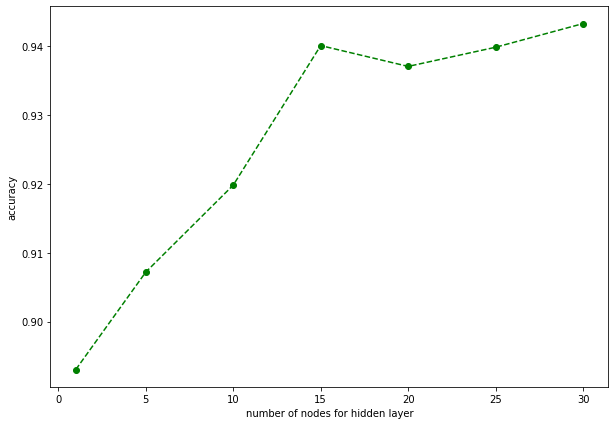

In [ ]:
x = params['hidden_layer_sizes']
y = gsres.cv_results_['mean_test_score']
plt.figure(figsize=(10,7))
plt.plot(x, y, 'g--o')
plt.xlabel('number of nodes for hidden layer')
plt.ylabel('accuracy');

In [ ]:
#Model Fitting
from sklearn.neural_network import MLPRegressor
Score_model = MLPRegressor(hidden_layer_sizes=(30), solver='adam', alpha=0.1, momentum=0.2,  max_iter=1000)

Score_model.fit(x0_train_scaled, y0_train_scaled.flatten())

#Model Testing
TrainModel = Score_model.score(x0_train_scaled, y0_train_scaled)
TestModel = Score_model.score(x0_test_scaled, y0_test_scaled)

print(TrainModel,TestModel)

0.9987286781547914 0.9987726501254698


In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(Score_model, x0_train_scaled, y0_train_scaled, cv=10, return_train_score=True)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when 

In [ ]:
print('Training scores')
print()
print('     train    test')
print(' n   score    score')
print('==   ======   ======')
train_scores, test_scores = scores['train_score'], scores['test_score']
for idx, cv_scores in enumerate(zip(train_scores, test_scores)):
    s_train, s_test = cv_scores[0], cv_scores[1]
    print(f'{idx+1:2d}   {s_train:6.4f}   {s_test:6.4f}')
print()
print(f'test set mean score = {np.mean(test_scores):.4f} +/- {np.std(test_scores):.4f}')

Training scores

     train    test
 n   score    score
==   ======   ======
 1   0.9645   0.9651
 2   0.9642   0.9635
 3   0.9650   0.9645
 4   0.9642   0.9646
 5   0.9635   0.9633
 6   0.9649   0.9657
 7   0.9648   0.9648
 8   0.9639   0.9634
 9   0.9649   0.9651
10   0.9657   0.9642

test set mean score = 0.9644 +/- 0.0008


In [ ]:
#Predict the Testing Data to Discover the Error
#Inverse (-1) to undo the transformation

y0_predict_scaled = Score_model_0.predict(x0_test_scaled)

y0_predict = y0_scaler.inverse_transform(y0_predict_scaled.reshape(-1,1)).flatten()
y0_test = y0_scaler.inverse_transform(y0_test_scaled.reshape(-1,1)).flatten()

#Find error and absolute error
test0_err = y0_test - y0_predict
abs0_test_err = np.abs(test0_err)
test0_err_pct = (test0_err / y0_test)*100
abs0_pct_err = np.abs(test0_err_pct)

print('actual   predct   error     % error')
print('======   ======   ======    ======')
for i in range(10):
    print('{0:6.3f}   {1:6.3f}   {2:6.3f}   {3:6.3f}'.format(y0_test[i], y0_predict[i], test0_err[i], abs0_pct_err[i]))

actual   predct   error     % error
======   ======   ======    ======
59.000   59.982   -0.982    1.665
79.000   77.476    1.524    1.929
67.000   66.311    0.689    1.028
53.000   52.117    0.883    1.665
80.000   82.671   -2.671    3.338
52.000   51.073    0.927    1.782
91.000   90.376    0.624    0.685
84.000   86.558   -2.558    3.046
70.000   69.228    0.772    1.103
45.000   45.759   -0.759    1.686


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


In [ ]:
#Put error in terms of percentages (unsigned error)

print('mean unsigned error    = {0:6.3f}'.format(np.mean(abs0_test_err)))
print('stdev unsigned error   = {0:6.3f}'.format(np.std(abs0_test_err)))
print('median unsigned error  = {0:6.3f}'.format(np.median(abs0_test_err)))
print('maximum unsigned error = {0:6.3f}'.format(np.max(abs0_test_err)))
print()
print('mean unsigned % error    = {0:6.3f}'.format(np.mean(test0_err_pct)))
print('stdev unsigned % error   = {0:6.3f}'.format(np.std(test0_err_pct)))
print('median unsigned % error  = {0:6.3f}'.format(np.median(test0_err_pct)))
print('maximum unsigned % error = {0:6.3f}'.format(np.max(test0_err_pct)))

mean unsigned error    =  1.294
stdev unsigned error   =  1.181
median unsigned error  =  1.007
maximum unsigned error = 13.493

mean unsigned % error    =    nan
stdev unsigned % error   =    nan
median unsigned % error  =  0.619
maximum unsigned % error =    inf


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:212: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
